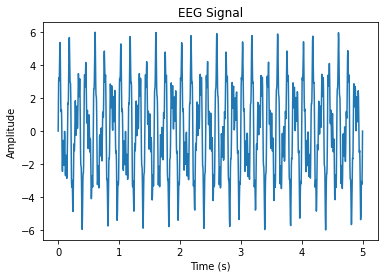

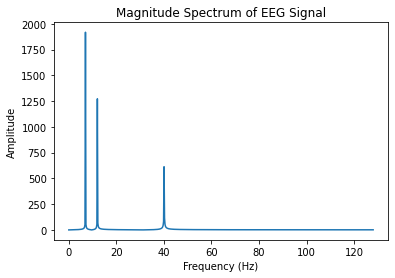

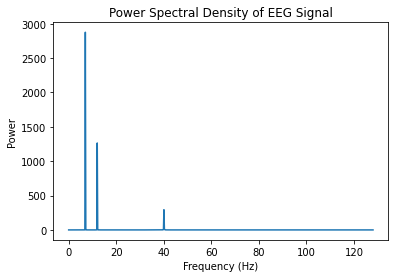

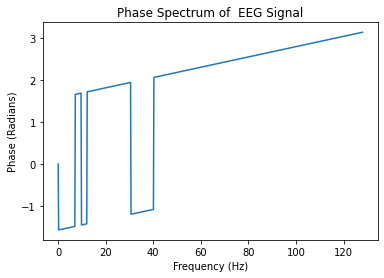

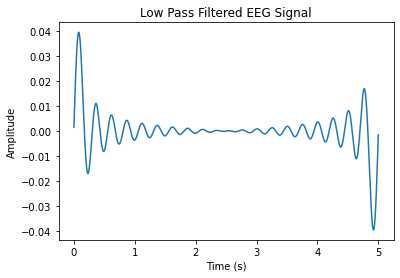

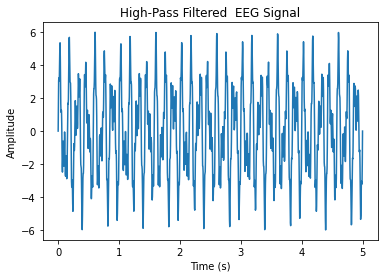

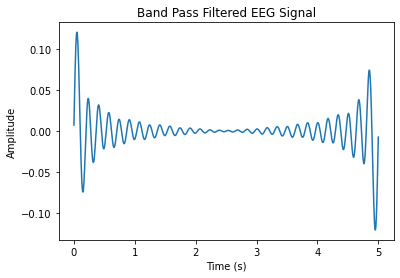

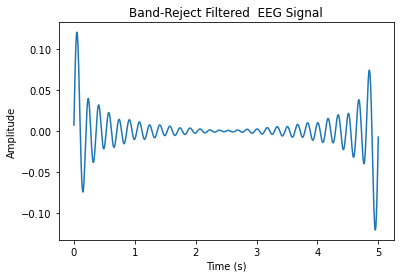

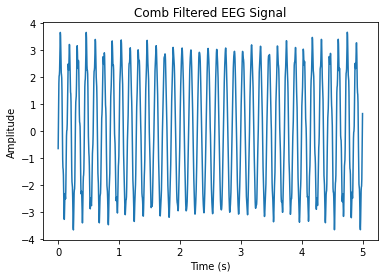

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft


sampling_rate = 256
time = np.linspace(0, 5, 5*sampling_rate)
eeg_signal = 3 * np.sin(2*np.pi*7*time) + 2 * np.sin(2*np.pi*12*time) + 1 * np.sin(2*np.pi*40*time)


plt.plot(time, eeg_signal)
plt.title("EEG Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Applying Some operation using fft

eeg_signal_fft = fft(eeg_signal)
magnitude_spectrum = np.abs(eeg_signal_fft)
frequencies = np.linspace(0, sampling_rate//2, len(magnitude_spectrum)//2)
plt.plot(frequencies, magnitude_spectrum[:len(frequencies)])
plt.title("Magnitude Spectrum of EEG Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.show()


# Power spectral density 
power_spectral_density = np.square(magnitude_spectrum) / len(eeg_signal)
plt.plot(frequencies, power_spectral_density[:len(frequencies)])
plt.title("Power Spectral Density of EEG Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.show()

# Phase Spectrum 
phase_spectrum = np.angle(eeg_signal_fft)
plt.plot(frequencies, phase_spectrum[:len(frequencies)])
plt.title("Phase Spectrum of  EEG Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (Radians)")
plt.show()


#Low Pass filter
cutoff_frequency = 20
low_pass_filter = np.zeros(len(eeg_signal_fft))
low_pass_filter[:cutoff_frequency] = 1
low_pass_filter[-cutoff_frequency:] = 1
filtered_eeg_signal_fft = low_pass_filter * eeg_signal_fft
filtered_eeg_signal = np.real(ifft(filtered_eeg_signal_fft))


plt.plot(time, filtered_eeg_signal)
plt.title("Low Pass Filtered EEG Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# High-pass filter 
cutoff_frequency = 20
high_pass_filter = np.ones(len(eeg_signal_fft))
high_pass_filter[:cutoff_frequency] = 0
high_pass_filter[-cutoff_frequency:] = 0
filtered_eeg_signal_fft = high_pass_filter * eeg_signal_fft
filtered_eeg_signal = np.real(ifft(filtered_eeg_signal_fft))


plt.plot(time, filtered_eeg_signal)
plt.title("High-Pass Filtered  EEG Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()





# Band-pass filter 
lower_cutoff_frequency = 10
upper_cutoff_frequency = 30
band_pass_filter = np.zeros(len(eeg_signal_fft))
band_pass_filter[lower_cutoff_frequency:upper_cutoff_frequency] = 1
band_pass_filter[-upper_cutoff_frequency:-lower_cutoff_frequency] = 1
filtered_eeg_signal_fft = band_pass_filter * eeg_signal_fft
filtered_eeg_signal = np.real(ifft(filtered_eeg_signal_fft))


plt.plot(time, filtered_eeg_signal)
plt.title("Band Pass Filtered EEG Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


# Band-reject filter 
lower_cutoff_frequency = 10
upper_cutoff_frequency = 30
band_reject_filter = np.ones(len(eeg_signal_fft))
band_reject_filter[:lower_cutoff_frequency] = 0
band_reject_filter[upper_cutoff_frequency:-upper_cutoff_frequency] = 0
band_reject_filter[-lower_cutoff_frequency:] = 0
filtered_eeg_signal_fft = band_reject_filter * eeg_signal_fft
filtered_eeg_signal = np.real(ifft(filtered_eeg_signal_fft))


plt.plot(time, filtered_eeg_signal)
plt.title("Band-Reject Filtered  EEG Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Comb filter 
comb_filter = np.ones(len(eeg_signal_fft))
comb_filter[::10] = 0
filtered_eeg_signal_fft = comb_filter * eeg_signal_fft
filtered_eeg_signal = np.real(ifft(filtered_eeg_signal_fft))


plt.plot(time, filtered_eeg_signal)
plt.title("Comb Filtered EEG Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


